# Spam Classification

The objective of it is to generate a model capable to classify a email as spam or not spam.

The dataset used was from http://www2.aueb.gr/users/ion/data/enron-spam/

## Imports

In [1]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import string
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /Users/phrc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/phrc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Functions

In [16]:
def createDf(path, isSpam):
    """
    Insert all the email context into a dataframe column and classify if the email is a spam or not

    Parameters
    ----------
    path: str
        Path o directory to be read
    isSpam: Boolean
        true is the files are spam or false otherwise        

    Returns
    ----------
    dataframe
        a dataframe with 2 columns isSpam and emailContext
    """
    os.chdir(path)
    data = []
    files = [file for file in os.listdir(path) if os.path.isfile(file)]
    for file in files:
        with open(file,'r', errors='ignore') as openFile:
            data.append(openFile.read())
    df = pd.DataFrame(data)
    df['isSpam'] = isSpam
    df.columns = ['text', 'isSpam']
    return df

def emailTextCleanner(text):
    """
    Remove the first apperance of the word 'Subject:'

    Parameters
    ----------
    text: str

    Returns
    ----------
    str
    """
    text = text.replace('Subject:', '', 1)
    return text

def lemmatizeList(words):
    """
    Lemmatize a list of string

    Parameters
    ----------
    words: list of str

    Returns
    ----------
    list of str
    """
    lem = WordNetLemmatizer()
    for i in range(len(words)):
        words[i] = lem.lemmatize(words[i], 'v')
    return words

def revomeWordsWithOneCharacter(words):
    return list(filter(lambda x : len(x) > 1, words))

def removeDigits(words):
    return list(filter(lambda x : x.isdigit() == False, words))

## Reading and preparing the dataset

In [17]:
#Change this line to your computer path from the dataset
path = '/Users/phrc/Documents/Projects/pythonProject/ML assement/enron2/'

#Create ham and spam df  
dfEnron2Ham = createDf(path+'ham/', False)
dfEnron2Spam = createDf(path+'spam/', True)

#Append ham and spam df
df = dfEnron2Ham.append(dfEnron2Spam)

#Remove 'Subject:'  
df['treatedText'] = df['text'].apply(emailTextCleanner)

#Remove Stop Words
stop = text.ENGLISH_STOP_WORDS
pat = r'\b(?:{})\b'.format('|'.join(stop))
df['treatedText'] = df['treatedText'].str.replace(pat, '')


#Remove punctuation
df['treatedText'] = df['treatedText'].str.replace('[{}]'.format(string.punctuation), '')

#Remove extra space and break lines
df['treatedText'] = df['treatedText'].str.replace('\n', ' ')

#Create a column with list of words
df['wordsList'] = df['treatedText'].str.split().apply(lemmatizeList).apply(revomeWordsWithOneCharacter).apply(removeDigits)



#Create a columns to calculate the total amount of words
df['totalTreatedWords'] = df['wordsList'].apply(lambda x : len(x))
df['treatedTextLen'] = df['treatedText'].apply(lambda x : len(x))
df['textLen'] = df['text'].apply(lambda x : len(x))
df['uniqueWordsLen'] = df['wordsList'].apply(lambda x : len(set(x)))

df.head()

,text,isSpam,treatedText,wordsList,totalTreatedWords,treatedTextLen,textLen,uniqueWordsLen
0,Subject: re : telephone interview with enron c...,False,telephone interview enron corp research d...,"[telephone, interview, enron, corp, research, ...",151,1403,1870,89
1,Subject: mscf speaker series\nmscf speaker ser...,False,mscf speaker series mscf speaker series dear ...,"[mscf, speaker, series, mscf, speaker, series,...",263,2410,2919,186
2,"Subject: re : info help .\nkrishna ,\nniclas i...",False,info help krishna niclas introduces as...,"[info, help, krishna, niclas, introduce, assoc...",268,2361,3254,184
3,"Subject: re : backtesting\nnaveen ,\nmost of t...",False,backtesting naveen tests coded cod...,"[backtesting, naveen, test, cod, code, associa...",66,590,808,52
4,Subject: powerisk 2000 - more cocktail info\n-...,False,powerisk 2000 cocktail info ...,"[powerisk, cocktail, info, forward, iona, macl...",229,1893,2299,166


## Visualisation

### Dataset distribution by spam type

Ham     4361
Spam    1496
Name: isSpam, dtype: int64


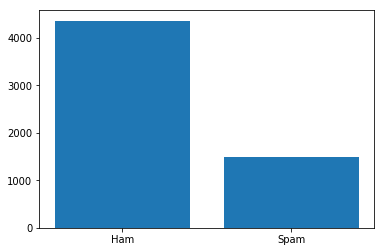

In [18]:
print(df['isSpam'].value_counts().rename({False: 'Ham', True: 'Spam'}))

plt.bar(np.arange(2), df['isSpam'].value_counts(), align='center')
plt.xticks(np.arange(2), ('Ham', 'Spam'))
plt.show()

### Compare text lenght for ham and spam  

There is 4 differents attributes what define the text lengh:

- textLen : This is the raw text without any treatment
- treatedTextLen: This is the text after removing the stop words and ponctuation
- totalTreatedWords: This is the amount of words used in the text after the treatment, basically this exclude space and line breaks
- uniqueWordsLen: This is the amount of unique words used in the treated text, basically it removes repited words

### Raw Text size lengh comparison  

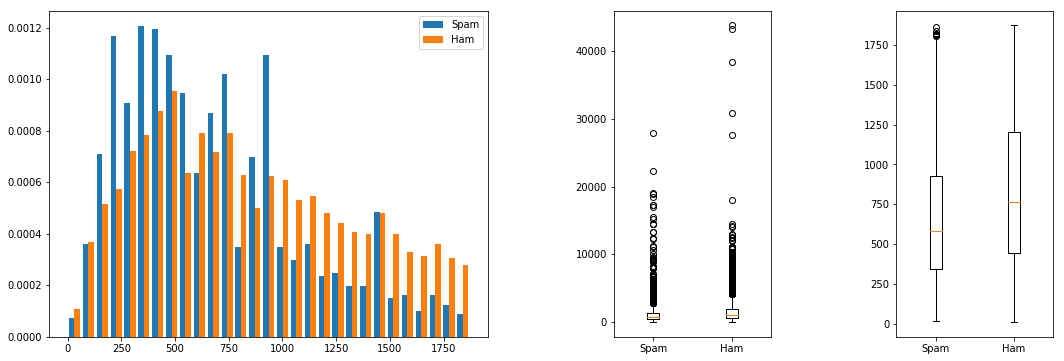

In [19]:
fig = plt.figure(figsize = (18,6))
grid = plt.GridSpec(1,4, wspace =0.8)
histPlt = fig.add_subplot(grid[0,0:2])
boxPlt1 = fig.add_subplot(grid[0,2])
boxPlt2 = fig.add_subplot(grid[0,3])

histPlt.hist(
    [
        df[df['isSpam'] == True]['textLen'], 
        df[df['isSpam'] == False]['textLen']
    ], 
    np.linspace(0, df['textLen'].quantile(0.75), 30), 
    density = True, 
    label=['Spam', 'Ham']
) 
histPlt.legend(loc='upper right')

boxPlt1.boxplot(
    (
         df[df['isSpam'] == True]['textLen'], 
         df[df['isSpam'] == False]['textLen'] 
    ), 
    labels = ('Spam', 'Ham')
)

boxPlt2.boxplot(
    (
        df[(df['isSpam'] == True) & (df['textLen'] < df['textLen'].quantile(0.75))]['textLen'], 
        df[(df['isSpam'] == False) & (df['textLen'] < df['textLen'].quantile(0.75))]['textLen'] 
    ), 
    labels = ('Spam', 'Ham')
)

plt.show()

### Text size without stop words and punctuation 

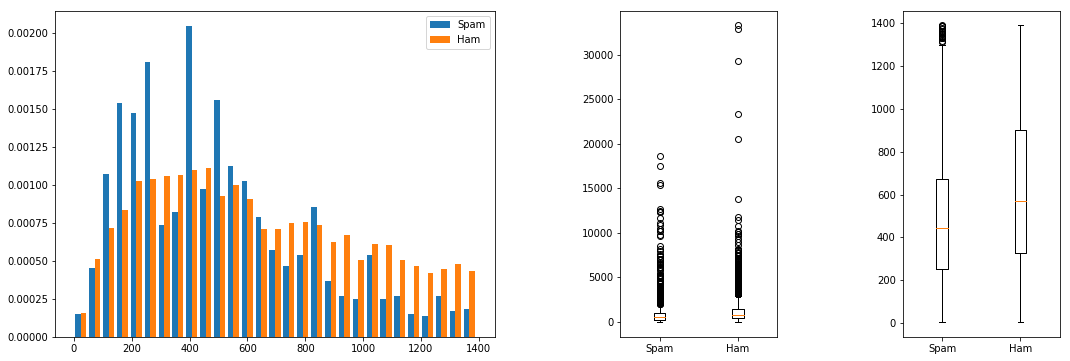

In [20]:
fig = plt.figure(figsize = (18,6))
grid = plt.GridSpec(1,4, wspace =0.8)
histPlt = fig.add_subplot(grid[0,0:2])
boxPlt1 = fig.add_subplot(grid[0,2])
boxPlt2 = fig.add_subplot(grid[0,3])

histPlt.hist(
    [
        df[df['isSpam'] == True]['treatedTextLen'], 
        df[df['isSpam'] == False]['treatedTextLen']
    ],  
    np.linspace(0, df['treatedTextLen'].quantile(0.75), 30),
    density= True,
    label=['Spam', 'Ham']
) 
histPlt.legend(loc='upper right')

boxPlt1.boxplot(
    (
        df[df['isSpam'] == True]['treatedTextLen'], 
        df[df['isSpam'] == False]['treatedTextLen'] ), 
    labels = ('Spam', 'Ham')
)

boxPlt2.boxplot(
    (
        df[(df['isSpam'] == True) & (df['treatedTextLen'] < df['treatedTextLen'].quantile(0.75))]['treatedTextLen'], 
        df[(df['isSpam'] == False) & (df['treatedTextLen'] < df['treatedTextLen'].quantile(0.75))]['treatedTextLen'] 
    ), 
    labels = ('Spam', 'Ham')
)

plt.show()



### Total words used

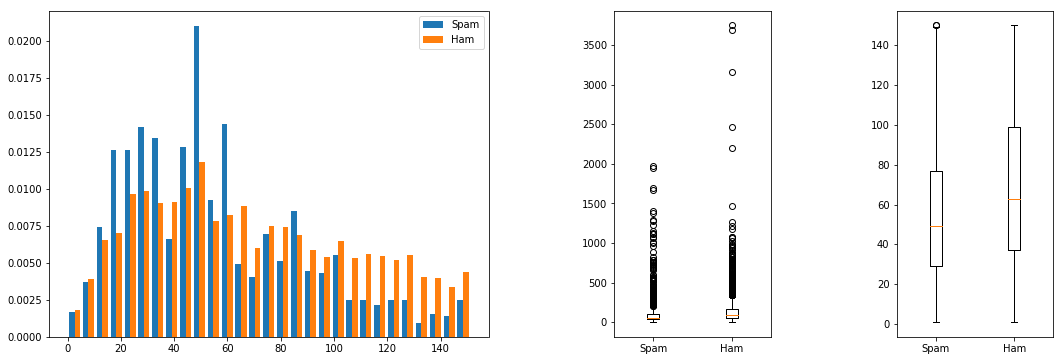

In [21]:
fig = plt.figure(figsize = (18,6))
grid = plt.GridSpec(1,4, wspace =0.8)
histPlt = fig.add_subplot(grid[0,0:2])
boxPlt1 = fig.add_subplot(grid[0,2])
boxPlt2 = fig.add_subplot(grid[0,3])

histPlt.hist(
    [
        df[df['isSpam'] == True]['totalTreatedWords'], 
        df[df['isSpam'] == False]['totalTreatedWords']
    ],  
    np.linspace(0, df['totalTreatedWords'].quantile(0.75), 30),
    density= True,
    label=['Spam', 'Ham']
) 
histPlt.legend(loc='upper right')

boxPlt1.boxplot(
    (
        df[df['isSpam'] == True]['totalTreatedWords'], 
        df[df['isSpam'] == False]['totalTreatedWords'] 
    ), 
    labels = ('Spam', 'Ham')
)

boxPlt2.boxplot(
    (
        df[(df['isSpam'] == True) & (df['totalTreatedWords'] < df['totalTreatedWords'].quantile(0.75))]['totalTreatedWords'], 
        df[(df['isSpam'] == False) & (df['totalTreatedWords'] < df['totalTreatedWords'].quantile(0.75))]['totalTreatedWords'] 
    ), 
    labels = ('Spam', 'Ham')
)

plt.show()


### Total unique words used

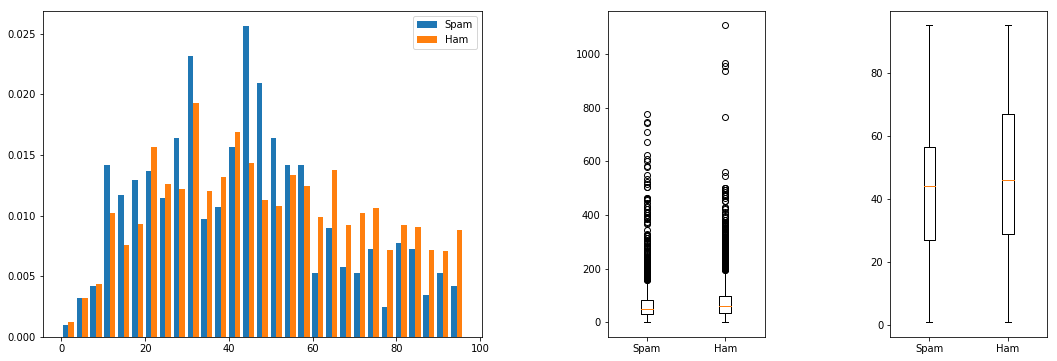

In [22]:
fig = plt.figure(figsize = (18,6))
grid = plt.GridSpec(1,4, wspace =0.8)
histPlt = fig.add_subplot(grid[0,0:2])
boxPlt1 = fig.add_subplot(grid[0,2])
boxPlt2 = fig.add_subplot(grid[0,3])

histPlt.hist(
    [
        df[df['isSpam'] == True]['uniqueWordsLen'], 
        df[df['isSpam'] == False]['uniqueWordsLen']
    ],  
    np.linspace(0, df['uniqueWordsLen'].quantile(0.75), 30),
    density= True,
    label=['Spam', 'Ham']
) 
histPlt.legend(loc='upper right')

boxPlt1.boxplot(
    (
        df[df['isSpam'] == True]['uniqueWordsLen'], 
        df[df['isSpam'] == False]['uniqueWordsLen'] 
    ), 
    labels = ('Spam', 'Ham')
)

boxPlt2.boxplot(
    (
        df[(df['isSpam'] == True) & (df['uniqueWordsLen'] < df['uniqueWordsLen'].quantile(0.75))]['uniqueWordsLen'], 
        df[(df['isSpam'] == False) & (df['uniqueWordsLen'] < df['uniqueWordsLen'].quantile(0.75))]['uniqueWordsLen'] 
    ), 
    labels = ('Spam', 'Ham')
)

plt.show()


### Conclusion

It's not clear the text size can influence into the classification of the email in spam or ham.



## Words Visualization

### Total uniques words

In [147]:
count = Counter(list(chain(*df["wordsList"].values)))

countSpam = Counter(list(chain(*df[df['isSpam'] == True]["wordsList"].values)))

countHam = Counter(list(chain(*df[df['isSpam'] == False]["wordsList"].values)))

print('Total unique words {}'.format(len(count)))
print('Total spam unique words {}'.format(len(countSpam)))
print('Total ham unique words {}'.format(len(countHam)))

Total unique words 32032
Total spam unique words 17842
Total ham unique words 20706


### Acummulative frequences

TypeError: 'AxesSubplot' object is not callable

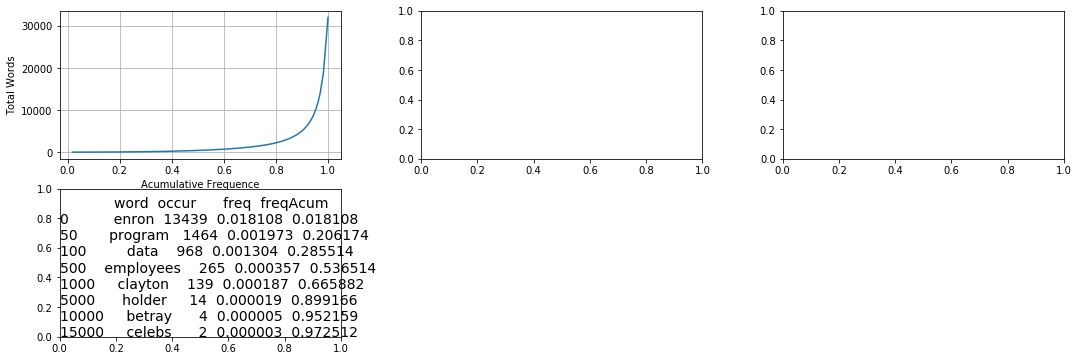

In [164]:
dfWords = pd.DataFrame(list(dict(count).items()))
dfWords.columns = ['word', 'occur'] 
totalOcurr = dfWords['occur'].sum()
dfWords['freq'] = dfWords['occur'] / totalOcurr  
dfWords = dfWords.sort_values(by='freq', ascending=False)
dfWords = dfWords.reset_index(drop=True)
dfWords['freqAcum'] = dfWords['freq'].cumsum()


dfSpamWords = pd.DataFrame(list(dict(countSpam).items()))
dfSpamWords.columns = ['word', 'occur'] 
totalSpamOcurr = dfSpamWords['occur'].sum()
dfSpamWords['freq'] = dfSpamWords['occur'] / totalSpamOcurr  
dfSpamWords = dfSpamWords.sort_values(by='freq', ascending=False)
dfSpamWords = dfSpamWords.reset_index(drop=True)
dfSpamWords['freqAcum'] = dfSpamWords['freq'].cumsum()

dfHamWords = pd.DataFrame(list(dict(countHam).items()))
dfHamWords.columns = ['word', 'occur'] 
totalHamOcurr = dfHamWords['occur'].sum()
dfHamWords['freq'] = dfHamWords['occur'] / totalHamOcurr  
dfHamWords = dfHamWords.sort_values(by='freq', ascending=False)
dfHamWords = dfHamWords.reset_index(drop=True)
dfHamWords['freqAcum'] = dfHamWords['freq'].cumsum()

#print(dfWords.loc[[0,50,100,500,1000,5000,10000,15000], : ])
#print(dfSpamWords.loc[[0,50,100,500,1000,5000,10000,15000], : ])
#print(dfHamWords.loc[[0,50,100,500,1000,5000,10000,15000], : ])


fig = plt.figure(figsize = (18,6))
grid = plt.GridSpec(2,6, wspace =0.8)
pltTotal = fig.add_subplot(grid[0,0:2])
pltTotalText = fig.add_subplot(grid[1,0:2])
pltSpam = fig.add_subplot(grid[0,2:4])
pltHam = fig.add_subplot(grid[0,4:6])

pltTotal.plot(dfWords['freqAcum'], range(len(dfWords)))
pltTotal.set_ylabel('Total Words')
pltTotal.set_xlabel('Acumulative Frequence')
pltTotal.grid(True)

pltTotalText.text(0, 0, str(dfWords.loc[[0,50,100,500,1000,5000,10000,15000], : ]), fontsize = 14)
pltTotalText.axes(False)

pltSpam.plot(dfSpamWords['freqAcum'], range(len(dfSpamWords)))
pltSpam.set_ylabel('Total Spam Words')
pltSpam.set_xlabel('Acumulative Frequence')
pltSpam.grid(True)

pltHam.plot(dfHamWords['freqAcum'], range(len(dfHamWords)))
pltHam.set_ylabel('Total Ham Words')
pltHam.set_xlabel('Acumulative Frequence')
pltHam.grid(True)

plt.show()

### 20 Most common words

In [143]:
dfTemp = pd.DataFrame.from_dict(count.most_common(20))
dfTemp = dfTemp.rename(columns={0: "word", 1 : "count"})
totalOcurr = dfFull['occur'].sum()
dfTemp['freq'] = dfTemp['count'] / totalOcurr  
#dfTemp.plot.bar(x = 'word', y = 'freq', legend = False)
#yPos = np.arange(len(dfTemp["word"]))
#plt.xticks(yPos, dfTemp["word"])

#plt.show()

print(dfTemp['freq'].sum())

0.12523764674813015


### 20 Most common words on non spam emails

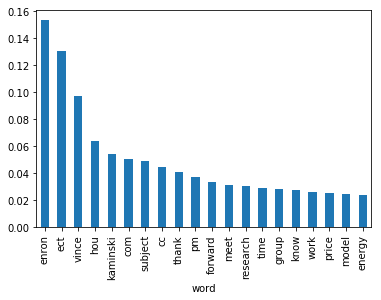

0.9999999999999999


In [29]:
countHam = Counter(list(chain(*df[df['isSpam'] == False]["wordsList"].values))).most_common(20)
dfHam = pd.DataFrame.from_dict(countHam)
dfHam = dfHam.rename(columns={0: "word", 1 : "count"})
totalOcurr = dfHam['count'].sum()
dfHam['freq'] = dfHam['count'] / totalOcurr  
dfHam.plot.bar(x = 'word', y = 'freq', legend = False)
yPosHam = np.arange(len(dfHam["word"]))
plt.xticks(yPosHam, dfHam["word"])

plt.show()



### 20 Most common words on spam emails

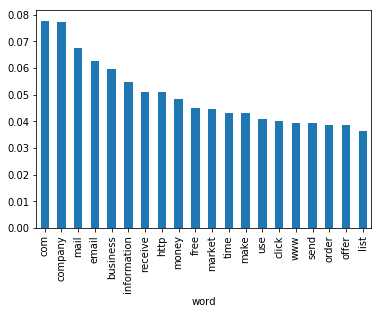

In [26]:
countSpam = Counter(list(chain(*df[df['isSpam'] == True]["wordsList"].values))).most_common(20)
dfSpam = pd.DataFrame.from_dict(countSpam)
dfSpam = dfSpam.rename(columns={0: "word", 1 : "count"})
totalOcurr = dfSpam['count'].sum()
dfSpam['freq'] = dfSpam['count'] / totalOcurr  
dfSpam.plot.bar(x = 'word', y = 'freq', legend = False)
yPosSpam = np.arange(len(dfSpam["word"]))
plt.xticks(yPosSpam, dfSpam["word"])

plt.show()

#### Word List

In [27]:
tempSet = sorted(set(list(chain(*df[df['isSpam'] == True]["wordsList"].values))))

print(tempSet)

['aa', 'aaa', 'aada', 'aal', 'aaliyah', 'aall', 'aan', 'aanbracht', 'aangekondigde', 'aanpak', 'aanpakken', 'aanwervingen', 'aanzet', 'aanzienlijke', 'aawesome', 'ab', 'aba', 'abacha', 'abaixo', 'abandon', 'abandonar', 'abargain', 'abattoir', 'abbas', 'abbestellen', 'abcsearch', 'abdalla', 'abdallat', 'abdul', 'abdulla', 'abeis', 'abels', 'aber', 'abf', 'abidjan', 'abiiity', 'abilene', 'abilities', 'ability', 'abit', 'able', 'ably', 'abnegate', 'abnormal', 'abnormality', 'abogadotlmsn', 'abondantly', 'abordar', 'abortive', 'aboutthis', 'aboutus', 'aboutvenita', 'aboveground', 'abovetelefax', 'abqewvbgf', 'abramov', 'abroad', 'abs', 'abscissa', 'abscond', 'absence', 'absender', 'absolute', 'absolutely', 'absolutes', 'absolve', 'absorb', 'abspielt', 'abstract', 'abstractive', 'absultely', 'absurd', 'abu', 'abuja', 'abundance', 'abundancegroup', 'abundant', 'abuse', 'abusive', 'abyssinia', 'ac', 'academia', 'academic', 'acadia', 'accelerate', 'accent', 'accept', 'acceptability', 'acceptab

In [28]:
lem = WordNetLemmatizer()
words = lem.lemmatize('accommodations')

words

'accommodation'

## Modeling

### Spliting prepare data set for modeling 

In [15]:
l = list(chain(*df["wordsList"].values))

l = set(filter(lambda k : len(k) == 1, l))

l

set()